In [ ]:
import os

# /content dizinindeki dosyaları listeleyin
print(os.listdir('/content'))


['.config', 'drive', 'fake_news_model.pkl', 'logs.txt', 'app.py', 'fake_or_real_news.csv', 'tfidf_vectorizer.pkl', 'sample_data']


In [ ]:
import pandas as pd

# CSV dosyasının yolu
file_path = '/content/fake_or_real_news.csv'

# CSV dosyasını pandas DataFrame olarak yükleyin
data = pd.read_csv(file_path)

# İlk birkaç satırı görüntüleyin
print(data.head())


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values (if any)
df = df.dropna()

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)

# Initialize TfidfVectorizer to convert text into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training and testing datasets
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [ ]:
# Initialize and train the PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Make predictions on the test set
y_pred = pac.predict(tfidf_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%")


Accuracy: 92.82%


Confusion Matrix:
[[589  49]
 [ 42 587]]


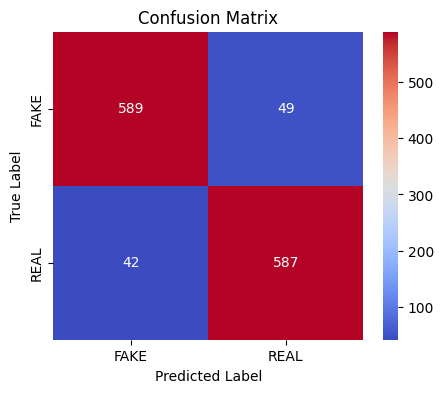

In [ ]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:")
print(conf_matrix)

# Display results as a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
# Define a function to predict whether a news article is fake or real
def predict_news(news):
    vectorized_input = tfidf_vectorizer.transform([news])  # Transform the input text
    prediction = pac.predict(vectorized_input)  # Make prediction
    return prediction[0]

# Example usage
news_example = "Kamala won the elections!"
result = predict_news(news_example)
print(f"The news is: {result}")


The news is: REAL


In [ ]:
import joblib

# Save the model and vectorizer
joblib.dump(pac, '/content/fake_news_model.pkl')
joblib.dump(tfidf_vectorizer, '/content/tfidf_vectorizer.pkl')

print("Model and vectorizer saved!")


Model and vectorizer saved!


In [ ]:
# Load the model and vectorizer
loaded_model = joblib.load('/content/fake_news_model.pkl')
loaded_vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')

# Test the loaded model
news_example = "COVID-19 vaccines are now available for free worldwide."
result = loaded_model.predict(loaded_vectorizer.transform([news_example]))
print(f"The loaded model predicts: {result}")


The loaded model predicts: ['FAKE']
